In [102]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (namespace)>

In [103]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import split_dataset

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [104]:
match = "2-1"

In [105]:
if match == "1-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.01
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "2-1":
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 16
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 64

In [106]:
#Create list of Data objects, each containing the node features, edge indices, and target values
data_list = ThreeFiveDataset(root=dataset_path, match=match)

In [107]:
train_loader, val_loader, test_loader = split_dataset(data_list)

In [108]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [109]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [110]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/100, Train Loss: 0.4770
Epoch 1/100, Validation Loss: 0.6960
Best model updated based on validation loss.
Epoch 2/100, Train Loss: 0.4254
Epoch 2/100, Validation Loss: 0.7179
No improvement in validation loss for 1 epoch(s).
Epoch 3/100, Train Loss: 0.4003
Epoch 3/100, Validation Loss: 0.4445
Best model updated based on validation loss.
Epoch 4/100, Train Loss: 0.3827
Epoch 4/100, Validation Loss: 0.5839
No improvement in validation loss for 1 epoch(s).
Epoch 5/100, Train Loss: 0.3742
Epoch 5/100, Validation Loss: 0.3499
Best model updated based on validation loss.
Epoch 6/100, Train Loss: 0.3837
Epoch 6/100, Validation Loss: 0.3890
No improvement in validation loss for 1 epoch(s).
Epoch 7/100, Train Loss: 0.3708
Epoch 7/100, Validation Loss: 0.3666
No improvement in validation loss for 2 epoch(s).
Epoch 8/100, Train Loss: 0.3581
Epoch 8/100, Validation Loss: 0.8602
No improvement in validation loss for 3 epoch(s).
Epoch 9/100, Train Loss: 0.3702
Epoch 9/100, Validation Loss: 0

([0.4770071358996847,
  0.42544388215280016,
  0.40034718494409854,
  0.3826742357186038,
  0.37421925019789565,
  0.3836981748242067,
  0.37080593232955283,
  0.3580599285413319,
  0.3701754680680119,
  0.35625980414359676,
  0.35274112899504934,
  0.3597179092014367,
  0.3542700544007213,
  0.3542881588741896,
  0.34632135593230545,
  0.3439313840339722,
  0.33217363922973636,
  0.3299550007998581,
  0.3262289454481802,
  0.3226304627117901,
  0.32094261745511277,
  0.3199705472291421,
  0.31709027155736075,
  0.31681611311625735,
  0.3217929206140008,
  0.3105487572406287,
  0.31507794878931966,
  0.3090603166403106,
  0.3139620688461099,
  0.31284776478364823,
  0.31237515876152616,
  0.3071985470511864,
  0.3054380017834214,
  0.30769034953757757,
  0.3086093123417785,
  0.3046830717289466,
  0.30997709303656934,
  0.30269682168892703,
  0.3018272496658087,
  0.30333489170561917,
  0.309474029321872,
  0.2997263687821143,
  0.3014614591148761,
  0.3057371819022334,
  0.32592528835

In [111]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [112]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(10, 16, heads=1)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(16, 8, heads=1)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=8, out_features=2, bias=True)
)
[np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
[np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]
Accuracy: 0.8883


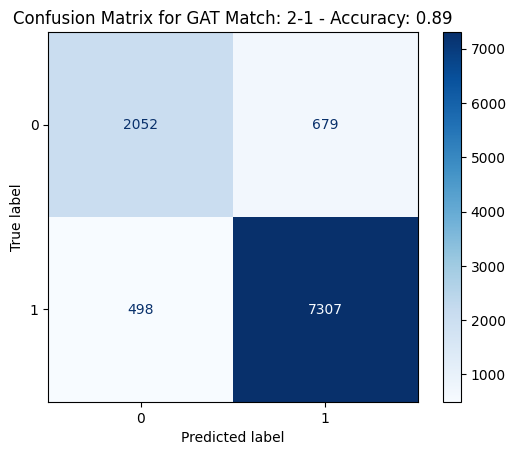

In [113]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [114]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9150
Recall: 0.9362
F1 Score: 0.9255
AUROC: 0.8438
Accuracy: 0.8883
Metrics saved to /Users/einar/Documents/EDISS/Period 1/DIE/ADES-reliability-estimation/src/../models/booster/results/2-1.csv
